In [ ]:
# Project name

In [1]:
print("Project name is Identify the sentiments")

Project name is Identify the sentiments


In [ ]:
# A brief about problem statement

In [ ]:
'''
Sentiment analysis remains one of the key problems that has seen extensive application of natural language processing. This 
time around, given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, 
etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.
The metric used for evaluating the performance of classification model would be weighted F1-Score
'''

In [ ]:
# Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [ ]:
# loading train and test dataset

In [3]:
train=pd.read_csv("C://Users//acer//Desktop//1sem//python//ISA//train.csv")
test=pd.read_csv("C://Users//acer//Desktop//1sem//python//ISA//test.csv")

In [ ]:
# A few rows from train dataset

In [4]:
train.sample(3)

,id,label,tweet
5988,5989,0,#just the #wind in the #trees #haveaniceday / #french #mothersday #timelapse #shotoniphone #ipho...
4535,4536,0,#Kids Why the Platypus Doesn't Sing http://bit.ly/mAVilk Get it On Sale for #iPhone #iPad
2370,2371,0,There are so cool staff in our shop. Browse tons of shaky designs that can protect your phone #f...


In [ ]:
# A few rows from test dataset

In [5]:
test.sample(3)

,id,tweet
575,8496,OnePlus One status : delivered ! #oneplus #oneplusone #geek #smartphone #neversettle http://inst...
1308,9229,This is apples third time replacing my phone since may? I'm about to get rid of this phone all t...
435,8356,Seriously I would rather still have a Motorola wings #hateios7 #hate02


In [ ]:
# Shape of dataset

In [6]:
print("shape of train dataset:",train.shape)
print("shape of test dataset:",test.shape)

shape of train dataset: (7920, 3)
shape of test dataset: (1953, 2)


In [ ]:
# A brief summary of train dataset

In [8]:
pd.DataFrame({"TotalMissing":train.isna().sum(),"%Missing":train.isna().mean(),"DataType":train.dtypes,"Unique":train.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.0,int64,7920
label,0,0.0,int64,2
tweet,0,0.0,object,7918


In [ ]:
# A brief summary of test dataset

In [9]:
pd.DataFrame({"TotalMissing":test.isna().sum(),"%Missing":test.isna().mean(),"DataType":test.dtypes,"Unique":test.nunique()})

,TotalMissing,%Missing,DataType,Unique
id,0,0.0,int64,1953
tweet,0,0.0,object,1953


In [ ]:
# Plotting label col

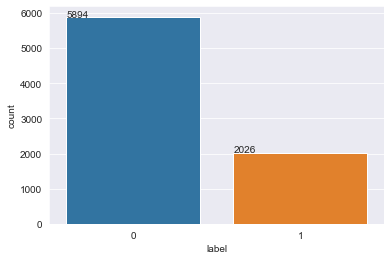

In [12]:
fig=sns.countplot(train["label"])
for count in fig.patches:
    fig.annotate((count.get_height()),(count.get_x(),count.get_height()))
plt.savefig("count of label.png")

In [ ]:
# Preprocessing of tweets

In [17]:
train['tweet']=train['tweet'].apply(lambda x: re.sub(re.compile(r'\s+'), ' ', x))
test['tweet']=test['tweet'].apply(lambda x: re.sub(re.compile(r'\s+'), ' ', x))

In [ ]:
# Converting all tweets to lower case

In [18]:
train['tweet']=train['tweet'].str.lower()
test['tweet']=test['tweet'].str.lower()

In [ ]:
# Processing of tweets

In [19]:
train['tweet']=train['tweet'].apply(lambda x: re.sub(r'[^a-z0-9]+',' ', x))
test['tweet']=test['tweet'].apply(lambda x: re.sub(r'[^a-z0-9]+',' ', x))

In [ ]:
# Lets see the dataset after processing tweets

In [21]:
train.sample(5)

,id,label,tweet
4743,4744,1,gdmt apple stop changing the gd interface every gd year apple
4565,4566,0,samsung galaxy tab 2 i really do have an amazing girlfriend a21c1a samsung tablet girl http inst...
1491,1492,0,posing curiously cute angel cutiepie girlnextdoor curious littleangel xperia sony https instagra...
5561,5562,0,quick bagel and out the door breakfast coffee and for breakfast pudding i have an apple http ins...
7095,7096,0,sunpolis 1 2 soon news gaming gamedev games art videogames apps iphone android indiedev ios andr...


In [ ]:
# Dividing dataset into dependent and independent features

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train['tweet'],train['label'],random_state=1,train_size=0.80)

In [ ]:
# Printing shape of dataset after splitting

In [23]:
print("shape of x_train:",X_train.shape)
print("shape of x_train:",y_train.shape)
print("shape of x_train:",X_test.shape)
print("shape of x_train:",y_test.shape)

shape of x_train: (6336,)
shape of x_train: (6336,)
shape of x_train: (1584,)
shape of x_train: (1584,)


In [ ]:
# Importing TFID

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vector=TfidfVectorizer(min_df=3,ngram_range=(1,3)).fit(X_train)
X_train=vector.transform(X_train)

In [ ]:
# Applying ML algo

In [36]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(X_train,y_train)
ypred=clf.predict(vector.transform(X_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred,y_test))

0.8794191919191919


In [43]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
ypred=clf.predict(vector.transform(X_test))
print(accuracy_score(ypred,y_test))

0.8907828282828283


In [ ]:
# Lets use multinomial NB for predicting sentiments in test dataset

In [46]:
prediction=clf.predict(vector.transform(test['tweet']))

In [ ]:
# Displaying result as per our submission file

In [47]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['label']=prediction

In [ ]:
# Lets see the final predicted dataframe

In [49]:
submission.sample(5)

,id,label
365,8286,0
1326,9247,0
1523,9444,0
1788,9709,1
1289,9210,0


In [ ]:
# converting to csv

In [50]:
submission.to_csv('submission1.csv',index=False)

In [ ]:
# Thank you